In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_csv('agricultural_yield.csv')
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [3]:
X=df[[	'Soil_Quality',	'Seed_Variety',	'Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm',	'Irrigation_Schedule']]	
y=df['Yield_kg_per_hectare']


In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [6]:
model=Sequential([
                Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
                 Dense(32,activation='relu'),
                 Dense(1)])

C:\Users\kgadg\anaconda3\envs\Deep_Learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
             loss='MSE',
             metrics=['MAE'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - MAE: 703.1187 - loss: 536919.6250 - val_MAE: 721.2413 - val_loss: 559509.1250
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 695.3824 - loss: 525058.2500 - val_MAE: 689.9913 - val_loss: 514773.4062
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 651.5840 - loss: 462840.0938 - val_MAE: 605.2509 - val_loss: 400303.5938
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 548.8002 - loss: 334305.5938 - val_MAE: 451.8734 - val_loss: 227607.8281
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 386.6474 - loss: 171512.4062 - val_MAE: 261.5178 - val_loss: 80725.1406
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 207.5974 - loss: 54274.6484 - val_MAE: 123.2546 - val_loss: 20797.1621
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 106.5182 - loss: 16457.2480 - val_MAE: 82.9585 - val_loss: 10661.6504
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 83.0435 - loss: 10746.4043 - va

In [11]:
test_loss,test_mae=model.evaluate(X_test,y_test,verbose=1)
print(f"The Mean Absolute Error: {test_mae:2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 42.4606 - loss: 2704.6875 
The Mean Absolute Error: 40.310741


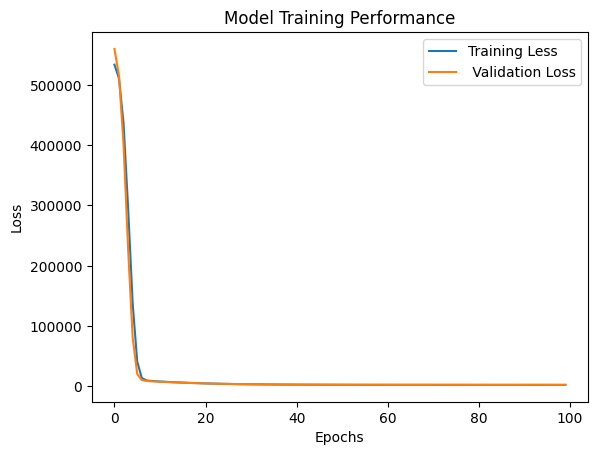

In [19]:
plt.plot(history.history ['loss'], label='Training Less')
plt.plot(history.history['val_loss'], label=' Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [24]:
predictions=model.predict(X_test)
predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[ 453.80017],
       [ 675.14465],
       [1072.9723 ],
       [ 666.2143 ],
       [ 826.47174],
       [ 991.9475 ],
       [ 302.25095],
       [ 595.2648 ],
       [ 458.50534],
       [ 808.5957 ],
       [ 605.145  ],
       [ 678.30774],
       [ 622.3463 ],
       [ 746.18115],
       [ 856.3701 ],
       [ 685.7782 ],
       [ 964.35144],
       [ 469.87173],
       [ 584.7084 ],
       [ 360.9152 ],
       [ 803.94104],
       [ 813.3029 ],
       [ 366.2008 ],
       [ 835.3401 ],
       [1005.69696],
       [ 593.33594],
       [ 655.7127 ],
       [ 971.4708 ],
       [ 629.4691 ],
       [ 631.0748 ],
       [ 681.9366 ],
       [ 817.5563 ],
       [ 830.4866 ],
       [ 793.9308 ],
       [ 522.05493],
       [ 716.9625 ],
       [ 722.7366 ],
       [1014.0913 ],
       [ 206.78766],
       [ 658.76306],
       [ 937.12756],
       [ 898.7871 ],
       [ 788.2906 ],
       [ 763.6526 ],
       [ 616.5194 ],
       [ 844.4596 ],
       [ 621.25635],
       [ 571.

C:\Users\kgadg\AppData\Local\Temp\ipykernel_31336\1679466719.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
C:\Users\kgadg\AppData\Local\Temp\ipykernel_31336\1679466719.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions, label='Predicted Yield')


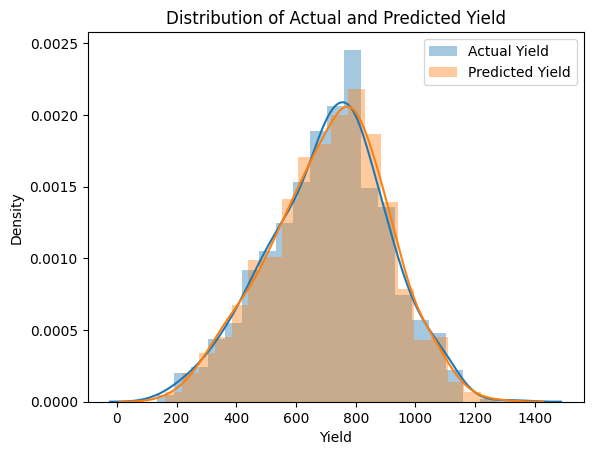

In [26]:
# Distribution plots
import seaborn as sns
sns.distplot(y_test, label='Actual Yield')
sns.distplot(predictions, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

In [22]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


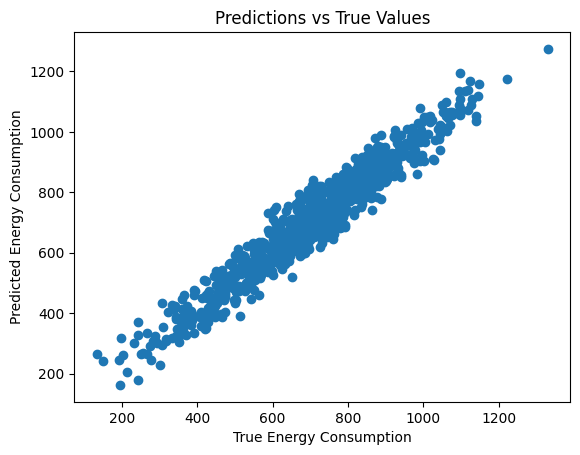

In [27]:
plt.scatter(y_test,predictions)
plt.xlabel("True Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Predictions vs True Values")
plt.show()